In [49]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import numpy as np
from pathlib import Path
from numpy.random import default_rng
rng = default_rng(12345)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
pd.options.mode.chained_assignment = None  # default='warn'
gpd.options.use_pygeos = True
from tqdm import trange, tqdm
from scipy.stats import lognorm

In [50]:
directory = Path("/Volumes/LaCie/workfolder/gitdata/SN_paper1/data/processeddata/in/gorkha2015_pga__22072022")
datapath = Path("/Volumes/LaCie/workfolder/gitdata/SN_paper1/data")

## Buildings impact

#### earthquake shaking

In [51]:
i = pd.read_csv(directory / "LS_impact_on_Buildings_NOCONN_It100000_2022-08-18.csv")
i.drop('geometry', axis=1, inplace=True)

geo = gpd.read_file(directory / "bldgs_preprocs_E4.shp")

In [52]:
impact = i.merge(geo[["osm_id", "geometry"]], on="osm_id", how="left")
impact = gpd.GeoDataFrame(impact, geometry="geometry")

In [53]:
impact.describe()

,osm_id,su_id,pga,E4,FlowR_mean,FlowR_std,count_impact
count,7.189624e+06,7.189624e+06,7.189624e+06,7.189624e+06,7.189624e+06,7.189624e+06,7.189624e+06
mean,6.513211e+08,2.605132e+04,2.015128e-01,7.441279e-05,1.351909e+02,1.190550e+01,3.944636e+00
std,2.550115e+08,9.491374e+03,1.989065e-01,8.625965e-03,5.845241e+02,1.084139e+02,2.682375e+01
min,-1.421203e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.138690e+08,1.927200e+04,4.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.596770e+08,2.676700e+04,1.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.265947e+08,3.472400e+04,3.200000e-01,0.000000e+00,3.300000e+01,1.049895e+00,0.000000e+00
max,1.066227e+09,3.842200e+04,7.800000e-01,1.000000e+00,8.008771e+04,2.324010e+04,7.408000e+03


In [54]:
# Get typology of the most numerous building in cell (should be by area???)
typology_list = []

for s in tqdm(impact.constructi):
    d = eval(s)
    max_key = max(eval(s), key = eval(s).get)
    typology_list.append(max_key)

100%|██████████| 7189624/7189624 [02:57<00:00, 40572.15it/s]


In [55]:
# add typologies to buildings
impact['typology'] = typology_list
values, count = np.unique(impact.typology, return_counts=True)

In [56]:
# get list of GEMs fragilities
path = Path(r'/Users/alexdunant/Documents/Github/SN_paper1/1_GEM_vulerabilities/global_fragility_vulnerability-master/vulnerability_curves/vulnerability_other_IMs').glob('*.csv')
gem_fragilities = [x for x in path if x.is_file()]

In [57]:
# Get the list of typologies from METEOR
for v in values:
    print(v)

C99/LFINF+DNO/HBET:1,3
C99/LFINF+DNO/HBET:4,7
C99/LFINF+DNO/HBET:8,20
MATO/LN
MUR+ADO/HBET:1,3
MUR+CL99+MOC
MUR+CL99+MOM
MUR+CL99/HBET:1,3
MUR+CL99/HBET:4,7
MUR+STRUB+MOL
MUR+STRUB+MOM
S
S/LFINF
W
W+WWD


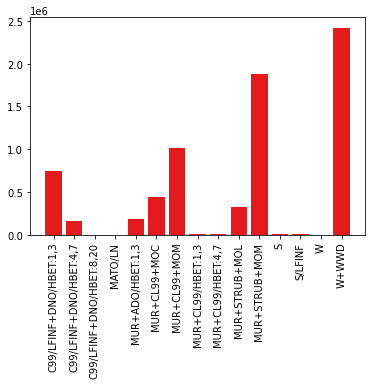

In [58]:
plt.bar(values, count)
plt.xticks(values, values, rotation='vertical')
plt.show()

https://platform.openquake.org/taxtweb/

https://docs.google.com/spreadsheets/d/1FMJGUwoTQUjEYIWqwOl8tTeMFJeYK5XUi7uUB2U3faw/edit#gid=0

C99 is concrete unknow reinforcement \
CR is concrete reinforcement \
MUR is Masonry unreinforced \
LWAL is wall (as lateral load resisiting frame) \
LFINF is infilled frame (lateral load resistance) \
DUC is ductile \
DNO is non ductile

[]

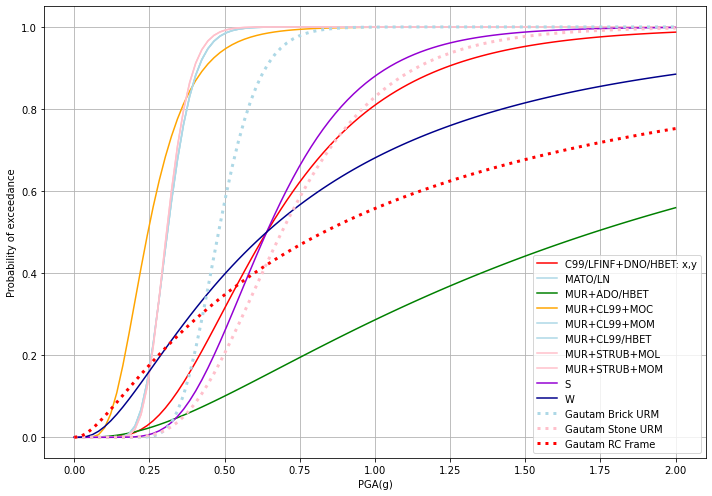

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,7)) # figsize=(10,7)
ax=fig.add_subplot(111)

# gem fragility
# csvname="MUR_LWAL-DNO_H1"
# gem = pd.read_csv("/Users/alexdunant/Documents/Github/SN_paper1/1_GEM_vulnerabilities/global_fragility_vulnerability-master/fragility_curves/fragility_other_IMs/"+csvname+".csv")

x=np.linspace(0,2,100)

ax.plot(x, lognorm(0.51,scale=0.64).cdf(x), label="C99/LFINF+DNO/HBET: x,y", c='red')
ax.plot(x, lognorm(0.223,scale=0.31).cdf(x), label="MATO/LN", c='lightblue')
ax.plot(x, lognorm(0.97,scale=1.73).cdf(x), label="MUR+ADO/HBET", c='green')
ax.plot(x, lognorm(0.445,scale=0.245).cdf(x), label="MUR+CL99+MOC", c="orange")
ax.plot(x, lognorm(0.223,scale=0.31).cdf(x), label="MUR+CL99+MOM", c='lightblue')
ax.plot(x, lognorm(0.223,scale=.31).cdf(x), label="MUR+CL99/HBET", c='lightblue')
ax.plot(x, lognorm(0.203,scale=.307).cdf(x), label="MUR+STRUB+MOL", c='pink')
ax.plot(x, lognorm(0.203,scale=.307).cdf(x), label="MUR+STRUB+MOM", c='pink')
ax.plot(x, lognorm(0.38,scale=.64).cdf(x), label="S", c='darkviolet')
ax.plot(x, lognorm(0.95,scale=.64).cdf(x), label="W", c='darkblue')

ax.plot(x, lognorm(0.22,scale=.48).cdf(x), label="Gautam Brick URM",
        linestyle="dotted", linewidth=3, c='lightblue')
ax.plot(x, lognorm(0.39,scale=.69).cdf(x), label="Gautam Stone URM",
        linestyle="dotted", linewidth=3, c='pink')
ax.plot(x, lognorm(1.29,scale=.83).cdf(x), label="Gautam RC Frame",
        linestyle="dotted", linewidth=3, c='red')

# ax.plot(gem[gem.columns[0]][:33], gem['Complete_damage'][:33], label=csvname)

ax.grid()
ax.set_xlabel("PGA(g)")
ax.set_ylabel("Probability of exceedance")
ax.legend(loc="best")

plt.tight_layout()
plt.plot()

In [60]:
# Probability of complete damage
conds = [
    impact['typology'] == 'C99/LFINF+DNO/HBET:1,3',
    impact['typology'] == 'C99/LFINF+DNO/HBET:4,7',
    impact['typology'] == 'C99/LFINF+DNO/HBET:8,20',
    impact['typology'] == 'MATO/LN',
    impact['typology'] == 'MUR+ADO/HBET:1,3',
    impact['typology'] == 'MUR+CL99+MOC',
    impact['typology'] == 'MUR+CL99+MOM',
    impact['typology'] == 'MUR+CL99/HBET:1,3',
    impact['typology'] == 'MUR+CL99/HBET:4,7',
    impact['typology'] == 'MUR+STRUB+MOL',
    impact['typology'] == 'MUR+STRUB+MOM',
    impact['typology'] == 'S',
    impact['typology'] == 'S/LFINF',
    impact['typology'] == 'W',
    impact['typology'] == 'W+WWD'
    ]

x = impact['pga']

choices = [
    lognorm(0.51,scale=0.64).cdf(x),
    lognorm(0.51,scale=0.64).cdf(x),
    lognorm(0.51,scale=0.64).cdf(x),
    lognorm(0.223,scale=0.31).cdf(x),
    lognorm(0.97,scale=1.73).cdf(x),
    lognorm(0.445,scale=0.245).cdf(x),
    lognorm(0.223,scale=0.31).cdf(x),
    lognorm(0.223,scale=0.31).cdf(x),
    lognorm(0.223,scale=0.31).cdf(x),
    lognorm(0.203,scale=0.307).cdf(x),
    lognorm(0.203,scale=0.307).cdf(x),
    lognorm(0.308,scale=0.64).cdf(x),
    lognorm(0.308,scale=0.64).cdf(x),
    lognorm(0.95,scale=0.64).cdf(x),
    lognorm(0.95,scale=0.64).cdf(x)
    ]

choicesG = [
    lognorm(1.29,scale=0.83).cdf(x),
    lognorm(1.29,scale=0.83).cdf(x),
    lognorm(1.29,scale=0.83).cdf(x),
    lognorm(0.39,scale=0.69).cdf(x),
    lognorm(0.22,scale=.48).cdf(x),
    lognorm(0.22,scale=.48).cdf(x),
    lognorm(0.22,scale=.48).cdf(x),
    lognorm(0.22,scale=.48).cdf(x),
    lognorm(0.22,scale=.48).cdf(x),
    lognorm(0.39,scale=0.69).cdf(x),
    lognorm(0.39,scale=0.69).cdf(x),
    lognorm(0.308,scale=0.64).cdf(x),
    lognorm(0.308,scale=0.64).cdf(x),
    lognorm(0.95,scale=0.64).cdf(x),
    lognorm(0.95,scale=0.64).cdf(x)
    ]

impact['Probability of complete damage'] = np.select(conds, choices)
impact['Probability of DS3 damage - Gautam'] = np.select(conds, choicesG)

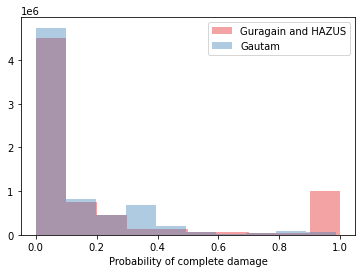

In [61]:
# Plot disctribution probability of complete damage 
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(impact['Probability of complete damage'], label = 'Guragain and HAZUS', alpha = 0.4)
ax.hist(impact['Probability of DS3 damage - Gautam'], label = 'Gautam', alpha = 0.4)

ax.set_xlabel('Probability of complete damage')

plt.legend()
plt.show()

In [62]:
# %%time
# impact = gpd.read_file(directory / "impacts_bldgs_w_damage.shp")

# import matplotlib.ticker as ticker
# # Create plot summarize the modelled impact from Gorkha earthquake

# fig, ax0  = plt.subplots(figsize=(10, 10))
# # plt.rc('font', size=15)


# # ax0 Map - % collapse buildings
# divider = make_axes_locatable(ax0)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# impact.plot(ax=ax0, column='Probabil_1', 
#          cmap='jet', 
#          edgecolor=None, 
#          linewidth=0, 
#          legend=True, 
#          cax=cax)
# cx.add_basemap(ax0, crs=impact.crs)


# ax0.set_title("Probability of DS3 damage per building")

# # fig.suptitle('Modelled impact from Gorkha earthquake shaking - Probability of Complete damage')
# plt.legend()
# plt.tight_layout()
# # plt.savefig("./fig/map_EQimpact_Gorkha2015.png")
# plt.show()

In [63]:
# # QC results
districts = gpd.read_file(datapath / "rawdata/Nepal_Districts_v2020_UTM45shp.shp")

# join impact data with districts
print("spatial join buildings and districts")
df = impact.sjoin(districts[['DISTRICT', 'geometry']], how='left')

spatial join buildings and districts


In [64]:
# remove duplicated building (sitting on districts line)
print("remove duplicated building")
df['area'] = df.geometry.area
df = df.sort_values("area", ascending = False).drop_duplicates(subset=["osm_id"], keep="first").drop(columns=["geometry"])

remove duplicated building


In [65]:
# merge with original geometry
if len(df) == len(impact):
    print("merge with original geometry")
    impact_district = impact[['osm_id', 'geometry']].merge(df, on="osm_id")#.fillna(0)

merge with original geometry


In [66]:
# count number of buildings collapsed by district
impact_district_NSET = impact_district.groupby(['DISTRICT']).agg({'Probability of complete damage':'sum', 'osm_id':'size', }).reset_index(level=0, drop=False)
impact_district_NSET.columns = ['DISTRICT', 'sum proba damage', 'count_osm_id']
impact_district_Gautam = impact_district.groupby(['DISTRICT']).agg({'Probability of DS3 damage - Gautam':'sum', 'osm_id':'size'}).reset_index(level=0, drop=False)
impact_district_Gautam.columns = ['DISTRICT', 'sum proba damage', 'count_osm_id']

display(impact_district_NSET, impact_district_Gautam)

,DISTRICT,sum proba damage,count_osm_id
0,ACHHAM,2.315457e-02,20106
1,ARGHAKHANCHI,1.208385e+01,29834
2,BAGLUNG,1.311077e+02,79014
3,BAITADI,6.573305e-13,16202
4,BAJHANG,8.756398e-03,57726
...,...,...,...
72,SYANGJA,1.242158e+03,85360
73,TANAHU,6.809489e+04,113326
74,TAPLEJUNG,8.480508e+00,35339
75,TERHATHUM,8.876008e-01,22801


,DISTRICT,sum proba damage,count_osm_id
0,ACHHAM,1.035717e-01,20106
1,ARGHAKHANCHI,3.578381e+01,29834
2,BAGLUNG,2.895742e+02,79014
3,BAITADI,4.633986e-27,16202
4,BAJHANG,8.148367e-02,57726
...,...,...,...
72,SYANGJA,7.332119e+02,85360
73,TANAHU,2.164817e+04,113326
74,TAPLEJUNG,1.478113e+01,35339
75,TERHATHUM,1.770813e+00,22801


In [67]:
# merge with Chaulagain et al
chaulagain = pd.read_csv(Path.cwd() / "Bldg_collapse_Chaulagain_2018.csv")

print("merge with Chaulagain")
resNSET = impact_district_NSET.merge(chaulagain, on="DISTRICT")
resGautam = impact_district_Gautam.merge(chaulagain, on="DISTRICT")

display(resNSET, resGautam)

merge with Chaulagain


,DISTRICT,sum proba damage,count_osm_id,Collapsed Residential Buildings,Partially damaged Residential Buildings,Collapsed Health Facilities,Partially damaged Health Facilities,Collapsed Government Buildings,Partially damaged Government Buildings
0,BHAKTAPUR,20454.261387,42514,18900,9054,6,20,5,51
1,DHADING,83341.096422,90281,81313,3092,69,37,93,58
2,DOLAKHA,63929.011021,68071,48880,3120,52,31,517,0
3,GORKHA,99612.509532,107821,59527,13428,40,39,227,36
4,KABHREPALANCHOK,130294.240733,140346,49933,23714,55,76,48,31
5,KATHMANDU,74949.425525,267018,43502,56024,11,52,85,277
6,LALITPUR,42744.325311,78558,17444,8064,19,20,217,198
7,MAKAWANPUR,89268.139974,125047,20035,17383,39,20,46,177
8,NUWAKOT,117013.864171,124339,75562,4200,55,44,15,14
9,OKHALDHUNGA,9333.996307,59358,10031,3107,15,15,18,38


,DISTRICT,sum proba damage,count_osm_id,Collapsed Residential Buildings,Partially damaged Residential Buildings,Collapsed Health Facilities,Partially damaged Health Facilities,Collapsed Government Buildings,Partially damaged Government Buildings
0,BHAKTAPUR,14165.981674,42514,18900,9054,6,20,5,51
1,DHADING,43917.459258,90281,81313,3092,69,37,93,58
2,DOLAKHA,39947.613752,68071,48880,3120,52,31,517,0
3,GORKHA,52685.649417,107821,59527,13428,40,39,227,36
4,KABHREPALANCHOK,57863.611503,140346,49933,23714,55,76,48,31
5,KATHMANDU,76998.965946,267018,43502,56024,11,52,85,277
6,LALITPUR,24627.603942,78558,17444,8064,19,20,217,198
7,MAKAWANPUR,39616.182629,125047,20035,17383,39,20,46,177
8,NUWAKOT,49807.740660,124339,75562,4200,55,44,15,14
9,OKHALDHUNGA,1176.503431,59358,10031,3107,15,15,18,38


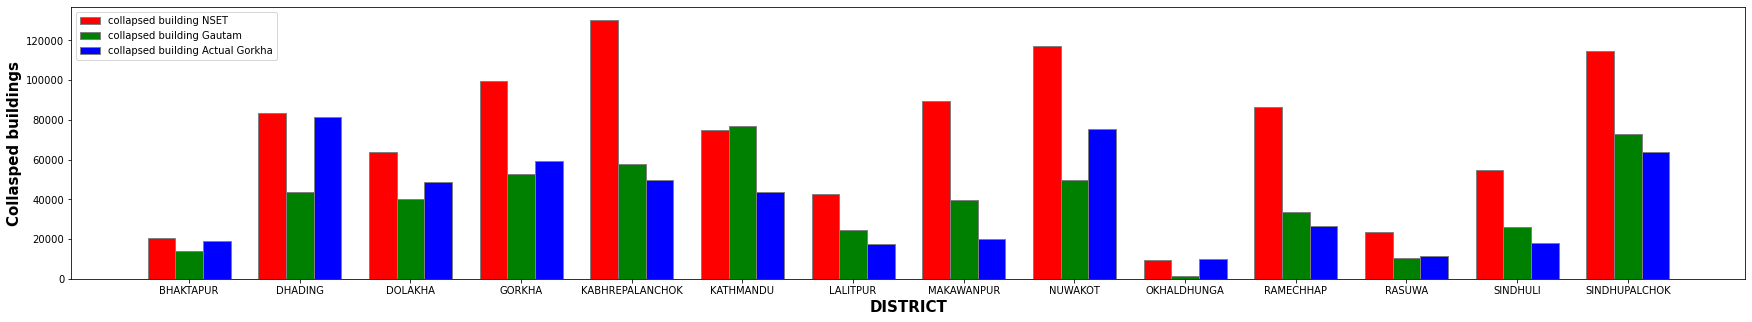

In [68]:
# plot QC
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(30, 5))
 
# set height of bar
RN = resNSET['sum proba damage'].values
RG = resGautam['sum proba damage'].values
CRB = resNSET['Collapsed Residential Buildings'].values
 
# Set position of bar on X axis
br1 = np.arange(len(RN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, RN, color ='r', width = barWidth,
        edgecolor ='grey', label ='collapsed building NSET')
plt.bar(br2, RG, color ='g', width = barWidth,
        edgecolor ='grey', label ='collapsed building Gautam')
plt.bar(br3, CRB, color ='b', width = barWidth,
        edgecolor ='grey', label ='collapsed building Actual Gorkha')
 
# Adding Xticks
plt.xlabel('DISTRICT', fontweight ='bold', fontsize = 15)
plt.ylabel('Collasped buildings', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(RN))],
        [d for d in resNSET['DISTRICT']])
 
plt.legend()
plt.show()

pearson correlation : 0.72


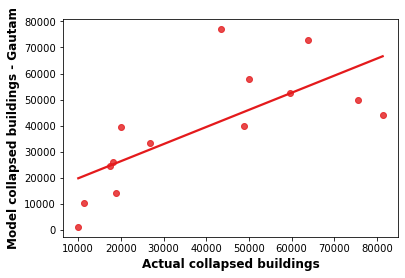

In [69]:
import seaborn as sns
sns.regplot(x=CRB, y=RG, ci=None)

plt.xlabel('Actual collapsed buildings', fontweight ='bold', fontsize = 12)
plt.ylabel('Model collapsed buildings - Gautam', fontweight ='bold', fontsize = 12)

correlation = np.corrcoef(CRB, RG)
# correlation = resNSET[['sum proba damage', 'Collapsed Residential Buildings']].corr()
print(f"pearson correlation : {round(correlation[0,1], 2)}")

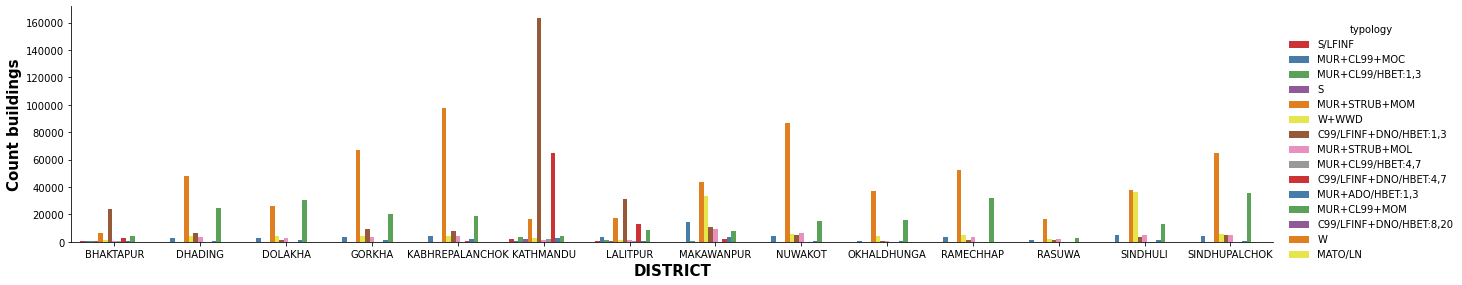

In [70]:
import seaborn as sns
sns.set_palette("Set1", 15)

df = impact_district[['DISTRICT', 'typology']].value_counts().reset_index(name='counts')
df = df[df.DISTRICT.isin(resNSET.DISTRICT)].sort_values("DISTRICT", ascending = True)

g = sns.catplot(x="DISTRICT", y="counts", hue="typology", kind="bar", data=df, height=4, aspect=4.5)

plt.xlabel('DISTRICT', fontweight ='bold', fontsize = 15)
plt.ylabel('Count buildings', fontweight ='bold', fontsize = 15)

plt.show()

#### landslide impact

![scetch AUCROC curve](https://developers.google.com/static/machine-learning/crash-course/images/AUCPredictionsRanked.svg)

![AUCROC curve](https://developers.google.com/static/machine-learning/crash-course/images/ROCCurve.svg)

https://www.listendata.com/2014/08/learn-area-under-curve-auc.html

0.8229734226928936


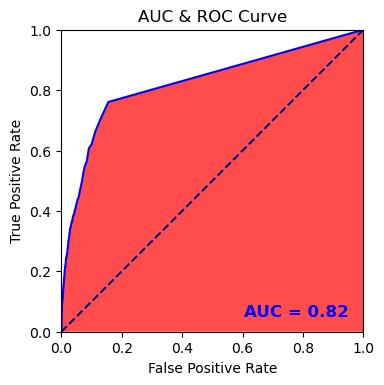

In [71]:
from sklearn import metrics


#calculate AUC of model
auc = metrics.roc_auc_score(impact.E4, impact.count_impact)

#print AUC score
print(auc)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(impact.E4, impact.count_impact)

plt.figure(dpi=100) # figsize=(5, 4), dpi=150
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='red', alpha=0.7)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# **Road impact**

In [72]:
i = pd.read_csv(directory / "LS_impact_on_Roads_NOCONN_It100000_2022-08-18.csv")
i.drop('geometry', axis=1, inplace=True)

geo = gpd.read_file(directory / "roads_preprocs_E4.shp")

In [73]:
impact = i.merge(geo[["osm_id", "geometry"]], on="osm_id", how="left")
impact = gpd.GeoDataFrame(impact, geometry="geometry")

In [75]:
impact.describe()

,osm_id,su_id,FlowR_mean,FlowR_std,FlowR_min,FlowR_max,E4,count_impact
count,1.170073e+06,1.170073e+06,1.170073e+06,1.170073e+06,1.170073e+06,1.170073e+06,1.170073e+06,1.170073e+06
mean,5.174479e+08,2.508188e+04,1.207321e+02,1.283088e+02,2.369307e+01,6.373121e+02,1.007288e-02,6.941526e+00
std,2.309031e+08,9.681270e+03,5.469990e+02,4.816515e+02,3.177455e+02,2.314504e+03,9.985701e-02,3.437903e+01
min,4.825621e+06,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.420459e+08,1.892700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.814270e+08,2.632800e+04,2.420213e+00,3.728308e+00,0.000000e+00,1.700000e+01,0.000000e+00,0.000000e+00
75%,6.263363e+08,3.347200e+04,4.947619e+01,5.298427e+01,0.000000e+00,2.590000e+02,0.000000e+00,1.000000e+00
max,1.066064e+09,3.841700e+04,9.643800e+04,4.641437e+04,9.643800e+04,1.370060e+05,1.000000e+00,3.292000e+03


0.9405997590072747


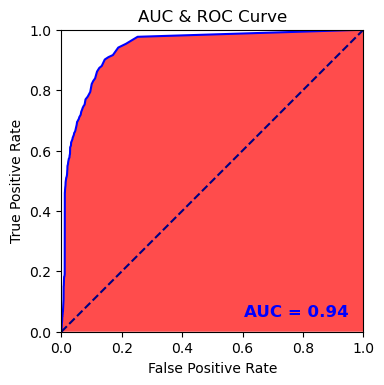

In [74]:
from sklearn import metrics


#calculate AUC of model
auc = metrics.roc_auc_score(impact.E4, impact.count_impact)

#print AUC score
print(auc)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(impact.E4, impact.count_impact)

plt.figure(dpi=100) # figsize=(5, 4), dpi=150
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='red', alpha=0.7)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()